In [165]:
# Import libraries
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib import rcParams

In [27]:
import numpy as np
import pandas as pd
import os

In [28]:
import datetime as dt
from datetime import date

# Reflect Tables into SQLAlchemy ORM

In [29]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [30]:
# Set path where the csv files are stored and confirm the path
path = "C:/088_SQLAlchemy/RU-SOM-DATA-PT-11-2019-U-C/02-Homework/10-Advanced-Data-Storage-and-Retrieval/Instructions/sqlalchemy-challenge"

# if necessary, change diectory to "Resources" to retrieve CSV files
os.chdir(path)

wheres_my_path = os.getcwd()
print("Current working directory: %s" %wheres_my_path)

Current working directory: C:\088_SQLAlchemy\RU-SOM-DATA-PT-11-2019-U-C\02-Homework\10-Advanced-Data-Storage-and-Retrieval\Instructions\sqlalchemy-challenge


In [31]:
# Create an engine for the hawaii.sqlite database
# 10-Advanced-Data-Storage-and-Retrieval/3/Activities/11-Stu_Chinook/Solved/Stu_Chinook.ipynb
engine = create_engine("sqlite:///Resources/hawaii.sqlite", echo=False)

In [32]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [33]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [34]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [39]:
# Create our session (link) from Python to the DB
session = Session(engine)

## Examine the structure and column names within the  tables

In [42]:
# 10-Advanced-Data-Storage-and-Retrieval/2/Activities/07-Ins_Exploration/Solved/Ins_Inspector.ipynb
# What are the column names and data types in each of the tables?
inspector = inspect(engine)

measurement_col_names = inspector.get_columns('Measurement')
print("Measurement:")
for c in measurement_col_names:
    print(c['name'], c["type"])
    
station_col_names = inspector.get_columns('station')
print("\nStations:")
for c in station_col_names:
    print(c['name'], c["type"])

Measurement:
id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT

Stations:
id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [43]:
import os
# Set path where the csv files are stored and confirm the path
path = "C:/088_SQLAlchemy/RU-SOM-DATA-PT-11-2019-U-C/02-Homework/10-Advanced-Data-Storage-and-Retrieval/Instructions"

# if necessary, change diectory to "Resources" to retrieve CSV files
os.chdir(path)

wheres_my_path = os.getcwd()
print("Current working directory: %s" %wheres_my_path)

Current working directory: C:\088_SQLAlchemy\RU-SOM-DATA-PT-11-2019-U-C\02-Homework\10-Advanced-Data-Storage-and-Retrieval\Instructions


In [44]:
# Query measurement table to review the data
measurements = pd.DataFrame(engine.execute('SELECT * FROM measurement').fetchall())

measurements.to_csv("measurements.csv", header='true')
measurements.head()

,0,1,2,3,4
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0


In [45]:
# Query the measurement table for the number of dates recorded?
print("---------------------------------------------------------")
measurement_count = session.query(func.count(Measurement.date)).all()
print(f"Number of measurements taken on record: {measurement_count}")

# Query the measurement table for the earliest date recorded?
print("---------------------------------------------------------")
earliest_record = session.query(Measurement.date).order_by(Measurement.date).first()
print(f"Earliest measurement taken on record: {earliest_record[0]}")

# Query the measurement table for the latest date recorded?
print("---------------------------------------------------------")
latest_record = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(f"Latest measurement taken on record: {latest_record[0]}")
print("---------------------------------------------------------")

---------------------------------------------------------
Number of measurements taken on record: [(19550,)]
---------------------------------------------------------
Earliest measurement taken on record: 2010-01-01
---------------------------------------------------------
Latest measurement taken on record: 2017-08-23
---------------------------------------------------------


In [46]:
# Query station table to review the data
HI_weather_stations = pd.DataFrame(engine.execute('SELECT * FROM station').fetchall(),columns=['Station ID','Station Code', 'Station Name', 'Latitude', 'Longitude', 'Elevation'])
HI_weather_stations.head()

,Station ID,Station Code,Station Name,Latitude,Longitude,Elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.4234,-157.8015,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.5213,-157.8374,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.3934,-157.9751,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.4992,-158.0111,306.6


In [47]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [58]:
# Import datetime library
import datetime
from datetime import date, timedelta

# Design a query to retrieve the last 12 months of precipitation data and plot the results
latest_date = latest_record[0]
reference_date = datetime.datetime.strptime(latest_date, "%Y-%m-%d")
year_in_days = 366
date_list = ([reference_date - datetime.timedelta(days=x) for x in range(0, year_in_days)])

# date_list_df = pd.DataFrame([reference_date - datetime.timedelta(days=x) for x in range(0, year_in_days)])

# Perform a query to retrieve the date and precipitation scores; sort by ascending date
start_date = date_list[365]
last_date = date_list[0]

print(f"Starting measurement date: {start_date}")
print(f"Ending measurement date: {last_date}")
print(" ")
print(" ")

date_prcp = session.query(Measurement.date, Measurement.prcp).\
            filter(Measurement.date >= start_date).order_by(Measurement.date.asc()).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
date_prcp_df = pd.DataFrame(date_prcp,columns=['Date','Precipitation'])
date_prcp_df = date_prcp_df.set_index('Date') 
date_prcp_df.head()

Starting measurement date: 2016-08-23 00:00:00
Ending measurement date: 2017-08-23 00:00:00
 
 


,Precipitation
Date,
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,NaN
2016-08-24,1.22


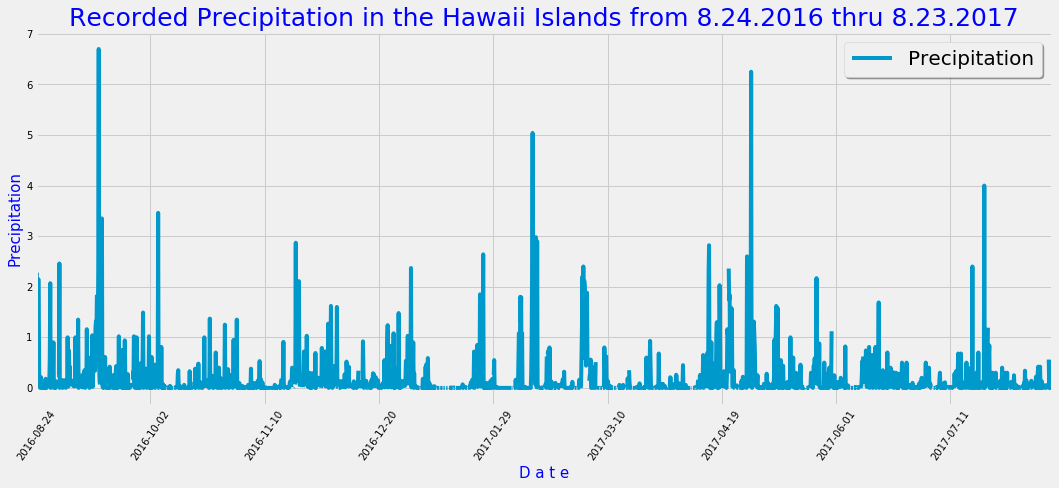

In [129]:
# Use Pandas Plotting with Matplotlib to plot the data
# color selection guide: https://www.w3schools.com/colors/colors_picker.asp

ax = date_prcp_df.plot(figsize=(15, 7), rot=55, color="#0099cc", fontsize=10, legend=True, grid=True);
ax.set_title("Recorded Precipitation in the Hawaii Islands from 8.24.2016 thru 8.23.2017", color="b", fontsize=25);
ax.set_xlabel("D a t e", color="b", fontsize=15);
ax.set_ylabel("Precipitation", color="b", fontsize=15);
# ax.set_xticks(tick_locations, Date,fontsize=15, rotation=0, ha="center")

plt.legend(loc="best", fontsize=20, fancybox=True, shadow=True)
plt.tight_layout()

# https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.grid.html
#     plt.grid(axis="y", linestyle="dashed", color="gray") 
 
# Save the image into a .png file
plt.savefig("C:/088_SQLAlchemy/RU-SOM-DATA-PT-11-2019-U-C/02-Homework/10-Advanced-Data-Storage-and-Retrieval/Instructions/sqlalchemy-challenge/Images/precep_HI_islands_0816-0817.png",dpi=100)

In [49]:
# Use Pandas to calcualte the summary statistics for the precipitation data
print(" ")
print("Summary Statistics on Precipitation Data on the Hawaii Islands - 8.24.2016 thru 8.23.2017:")
date_prcp_df.describe()

 
Summary Statistics on Precipitation Data on the Hawaii Islands - 8.24.2016 thru 8.23.2017:


,Precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


## Exploratory Station Analysis

In [50]:
# Design a query to show how many stations are available in this dataset?
import time
import datetime
print("------------------------------------------------------------")
last_look = str(last_date)[:-9]

station_count = session.query(Station.id).count() 
print(f' As of {last_look}, there were {station_count} weather stations in Hawaii.')
print("------------------------------------------------------------")
print(" ")
print(f' These weather stations are listed as follows:')

HI_weather_stations.head(10)

------------------------------------------------------------
 As of 2017-08-23, there were 9 weather stations in Hawaii.
------------------------------------------------------------
 
 These weather stations are listed as follows:


,Station ID,Station Code,Station Name,Latitude,Longitude,Elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6
5,6,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
6,7,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
7,8,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9
8,9,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4


In [51]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
most_active_stations =  session.query(Measurement.station, func.count(Measurement.station)).\
                    group_by(Measurement.station).\
                    order_by(func.count(Measurement.station).desc()).all()
print(f' The most active weather stations in Hawaii are listed as follows:')
most_active_stations

 The most active weather stations in Hawaii are listed as follows:


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [219]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
print("-------------------------------------------------------------------------------------------------------------------")
print(f' The lowest, average and highest temperature recorded by the most active weather station in Hawaii are as follows:')

get_tobs_stats = [func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)]

most_active_station = session.query(*get_tobs_stats).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.id).desc()).first()

most_active_station

# print(" ")
# print("-------------------------------------------------------------------------------------------------------------------")

-------------------------------------------------------------------------------------------------------------------
 The lowest, average and highest temperature recorded by the most active weather station in Hawaii are as follows:


(54.0, 85.0, 71.66378066378067)

In [80]:
# Choose the station with the highest number of temperature observations.
most_active_HIstation =  session.query(Measurement.station, func.count(Measurement.station)).\
                    group_by(Measurement.station).\
                    order_by(func.count(Measurement.station).desc()).first()
big_dawg = str(most_active_HIstation)[2:-8]
print("------------------------------------------------------------------------------------------------------------")
print(f' As of {last_look}, the station with the highest number of temperature observations is station, {big_dawg}.')

# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
most_active_HIstation_12monthdata =  session.query(Measurement.date,Measurement.tobs).\
                    filter(Measurement.station == big_dawg).\
                    filter(Measurement.date > start_date).all()

print("------------------------------------------------------------------------------------------------------------")
print(f' A sampling of temperature observations from station, {big_dawg} is as follows:')
most_active_HIstation_12monthdata[:20]

------------------------------------------------------------------------------------------------------------
 As of 2017-08-23, the station with the highest number of temperature observations is station, USC00519281.
------------------------------------------------------------------------------------------------------------
 A sampling of temperature observations from station, USC00519281 is as follows:


[('2016-08-24', 77.0),
 ('2016-08-25', 80.0),
 ('2016-08-26', 80.0),
 ('2016-08-27', 75.0),
 ('2016-08-28', 73.0),
 ('2016-08-29', 78.0),
 ('2016-08-30', 77.0),
 ('2016-08-31', 78.0),
 ('2016-09-01', 80.0),
 ('2016-09-02', 80.0),
 ('2016-09-03', 78.0),
 ('2016-09-04', 78.0),
 ('2016-09-05', 78.0),
 ('2016-09-06', 73.0),
 ('2016-09-07', 74.0),
 ('2016-09-08', 80.0),
 ('2016-09-09', 79.0),
 ('2016-09-10', 77.0),
 ('2016-09-11', 80.0),
 ('2016-09-12', 76.0)]

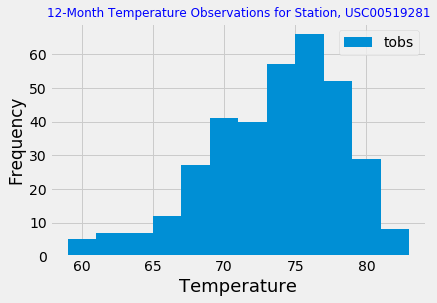

In [122]:
show_me_the_big_dawg = pd.DataFrame(most_active_HIstation_12monthdata)
# plt.figure(figsize=(6, 4), dpi=100)
show_me_the_big_dawg.plot(kind="hist",bins=12);

plt.title(f"12-Month Temperature Observations for Station, {big_dawg}", color="b", fontsize=12);
plt.xlabel("Temperature", fontsize=18)

# Save the image into a .png file
plt.savefig("C:/088_SQLAlchemy/RU-SOM-DATA-PT-11-2019-U-C/02-Homework/10-Advanced-Data-Storage-and-Retrieval/Instructions/sqlalchemy-challenge/Images/most_active_HIStation_histogram",dpi=100)

In [16]:
# Sample:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [96]:
# Solution:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
trip_start_date = '2012-02-28'
trip_end_date = '2012-03-05'

def calc_temps(trip_start_date, trip_end_date):
    """TMIN, TAVG, and TMAX for a list of dates. 
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d     
    Returns:
        TMIN, TAVE, and TMAX
    """   
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= trip_start_date).filter(Measurement.date <= trip_end_date).all()

# function usage example
print(calc_temps(trip_start_date, trip_end_date))

# Alternate approach: run the sample code, use and store dates into the same variable names - start_date and end_date
# Trip_temp_readings = calc_temps(start_date, end_date)[0]
# Trip_temp_readings

[(62.0, 69.57142857142857, 74.0)]


C:\Users\Ramon\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:36: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


<Figure size 1200x1800 with 0 Axes>

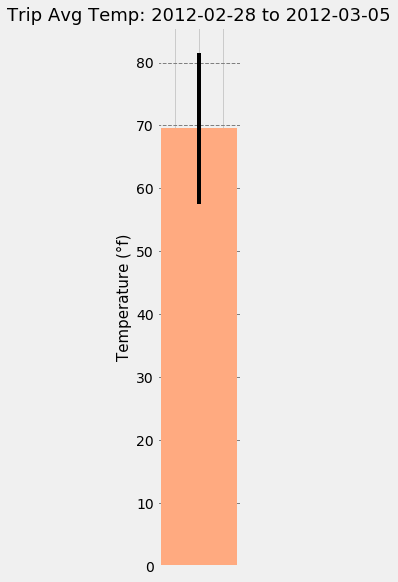

In [193]:
# Plot the results from your previous query as a bar chart.
# rcParams.update({'figure.autolayout': True})
Trip_temp_readings = calc_temps(trip_start_date, trip_end_date)[0]
x_pos = [0]
y_pos = [Trip_temp_readings[1]]
error = [(Trip_temp_readings[2] - Trip_temp_readings[0])]

# manipulate figure dimensions without using the figure environment. 
# https://stackoverflow.com/questions/332289/how-do-you-change-the-size-of-figures-drawn-with-matplotlib
plt.rcParams["figure.figsize"] = (2,8)
# figure(num=None, figsize=(4, 15), dpi=100, edgecolor='k')
plt.figure(figsize=(12, 18), dpi=100, edgecolor='k')

fig, ax = plt.subplots()
ax.tick_params(labelbottom=False)
plt.grid(axis="y", linestyle="dashed", color="gray"); 
plt.xlim([-1, 1]);
plt.ylim([-0.5, 110]);
plt.tight_layout();
plt.autoscale();

# color selection guide: https://www.w3schools.com/colors/colors_picker.asp
plt.bar(x_pos,y_pos,color='#ffaa80', yerr=error)


# Use "Trip Avg Temp" as your Title
plt.title("Trip Avg Temp: %s to %s" %(trip_start_date, trip_end_date), fontsize=18)

# Use the average temperature for the y value
plt.ylabel("Temperature (°f)", fontsize=15)
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

# Save the image into a .png file
# plt.autoscale()
# plt.tight_layout()
plt.savefig("C:/088_SQLAlchemy/RU-SOM-DATA-PT-11-2019-U-C/02-Homework/10-Advanced-Data-Storage-and-Retrieval/Instructions/sqlalchemy-challenge/Images/Trip_Avg_Temp_0228-03052012",dpi=100, orientation='portrait')

In [225]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
import datetime
from datetime import date, timedelta

trip_start_date = '2012-02-28'
trip_end_date = '2012-03-05'

yr_from_start_date = '2011-02-28'
yr_from_end_date = '2011-03-05'

sel = [Station.station,Station.name,Station.latitude,Station.longitude,Station.elevation,func.sum(Measurement.prcp)]

query_rainfall = session.query(*sel).\
    filter(Station.station == Measurement.station).\
    group_by(Measurement.station).\
    filter(Measurement.date >= yr_from_start_date).\
    filter(Measurement.date <= yr_from_end_date).\
    order_by(func.sum(Measurement.prcp).desc()).all()
  
rainfall_summary = pd.DataFrame(query_rainfall, columns=['Station ID','Station Name','Latitude','Longitude','Elevation','Total Precipitation'])
rainfall_summary

,Station ID,Station Name,Latitude,Longitude,Elevation,Total Precipitation
0,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6,2.33
1,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9,2.23
2,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5,2.19
3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0,1.96
4,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4,1.45
5,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6,1.44
6,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0,1.38
7,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9,0.63
8,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9,NaN


## Optional Challenge Assignment

In [217]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [224]:
# calculate the daily normals for your trip
import datetime as dt
from datetime import date, timedelta

# push each tuple of calculations into a list called `normals`
normals =[]

# Set the start and end date of the trip
trip_start_date = '2012-02-28'
trip_end_date = '2012-03-05'

print("---------------------------------------------------------------------------------------------------------------")
print(f' The week-long planned vacation starts on {trip_start_date} and ends on {trip_end_date}.')
# print("---------------------------------------------------------------------------------------------------------------")


# Use the start and end date to create a range of dates
range_start_date = dt.datetime.strptime(trip_start_date,'%Y-%m-%d')
range_end_date = dt.datetime.strptime(trip_end_date,'%Y-%m-%d') 
date_range = range_end_date - range_start_date

for i in range(date_range.days + 1):
    number_of_days = range_start_date + dt.timedelta(days=i)
    
# Stip off the year and save a list of %m-%d strings
    just_month_day = dt.datetime.strftime(number_of_days,'%m-%d')
    normals.append(just_month_day)
    
# Loop through the list of %m-%d strings and calculate the normals for each date    
last_year_normals = []
for day in normals:
    last_year_normals.append(daily_normals(day)[0])
    
print("---------------------------------------------------------------------------------------------------------------")
print(f' The lowest, average and highest temperature recorded on the same dates from the previous year are as follows:')
last_year_normals

---------------------------------------------------------------------------------------------------------------
 The week-long planned vacation starts on 2012-02-28 and ends on 2012-03-05.
---------------------------------------------------------------------------------------------------------------
 The lowest, average and highest temperature recorded on the same dates from the previous year are as follows:


[(65.0, 70.65517241379311, 80.0),
 (67.0, 71.73333333333333, 79.0),
 (64.0, 70.0327868852459, 76.0),
 (61.0, 70.36666666666666, 78.0),
 (60.0, 70.06896551724138, 78.0),
 (57.0, 69.27272727272727, 77.0),
 (60.0, 67.89090909090909, 76.0)]

In [229]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
print(" ")
print(f' Summary of temperature readings from {trip_start_date} through {trip_end_date}:')

last_year_normals_summ = pd.DataFrame(last_year_normals,columns=["tmin","tavg","tmax"],index=[normals])
last_year_normals_summ .index = last_year_normals_summ.index.get_level_values(0)
last_year_normals_summ 

 
 Summary of temperature readings from 2012-02-28 through 2012-03-05:


,tmin,tavg,tmax
02-28,65.0,70.655172,80.0
02-29,67.0,71.733333,79.0
03-01,64.0,70.032787,76.0
03-02,61.0,70.366667,78.0
03-03,60.0,70.068966,78.0
03-04,57.0,69.272727,77.0
03-05,60.0,67.890909,76.0


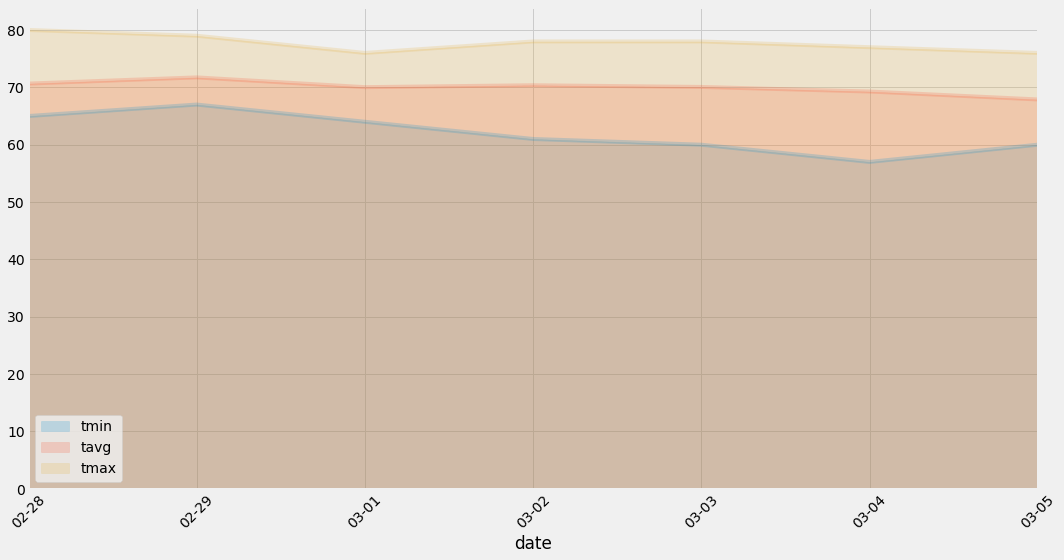

In [234]:
# Plot the daily normals as an area plot with `stacked=False`
plt.rcParams["figure.figsize"] = (15,8)
last_year_normals_summ.plot(kind="area",stacked=False,rot=45,alpha=.2);
plt.xlabel("date");

plt.savefig("C:/088_SQLAlchemy/RU-SOM-DATA-PT-11-2019-U-C/02-Homework/10-Advanced-Data-Storage-and-Retrieval/Instructions/sqlalchemy-challenge/Images/AreaPlot_AvgTemp_0228-03052012",dpi=100)